# BUSINESS UNDERSTANDING

# DATA UNDERSTANDING

In [399]:
# ------- [Import all relevant libraries] -------

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# String manipulation
import re

# Mathematical Operations
import math

# Display settings
pd.set_option('display.max_colwidth', None)
from IPython.display import display

Loading the data.

In [400]:
# Load data
data = pd.read_csv('../Raw Data/marketing_sample_for_naukri_jobs.csv')
data

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Planning","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clients| requirements| negotiating| client| online bidding| good communication| technology,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech Operations,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| Intellectual property| Electronics| Support services| Research| Management| Human resource management| Research Executive,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Maintenance","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| web testing| web technologies,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
...,...,...,...,...,...,...,...,...,...,...,...
29995,3510f2146b514f112eaa9706a16b3900,2019-07-06 21:12:51 +0000,MTS-Software-Engineer,Not Disclosed by Recruiter,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| Firmware| Open source| MTS| Enterprise software,Programming & Design,Bengaluru,"IT Software - Embedded , EDA , VLSI , ASIC , Chip Design","Semiconductors, Electronics",Software Developer
29996,4af8c56f5b4c535b1974065003f2d548,2019-08-05 23:55:08 +0000,Client Relationship Manager,Not Disclosed by Recruiter,1 - 5 yrs,Service delivery| LMS| CRE| Integration services| Content development| Client management| CRM,Operations,Chennai,"ITES , BPO , KPO , LPO , Customer Service , Operations","Education, Teaching, Training",Operations Manager
29997,43d5b806b26ed99d3ebfc8f366b4cdd1,2019-08-05 09:41:29 +0000,Assoc. Prof.- CS,Not Disclosed by Recruiter,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Howrah,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
29998,8bc87d14cf56564f16b6d4bae80180be,2019-08-06 01:44:55 +0000,Application/Cyber Security Specialist-Pune,Not Disclosed by Recruiter,5 - 10 yrs,Security Analysis| Software Development Life Cycle| Security Testing| Cyber Security| Application Security| New Projects| Code Review| Project Development| Software Solutions| Security Services,Programming & Design,Pune,"IT Software - Application Programming , Maintenance","IT-Software, Software Services",Software Developer


Carry out Initial Data Exploration. 

This includes:

1. Checking the number of rows and columns.
2. Checking the column names to see if there is going to be any standardization needs.
3. Checking metadata.
4. Getting descriptive statistics.
5. Checking the data's completeness, i.e. checking for duplicates and missing values.

In [401]:
# ---- [Initial Data Exploration (IDE)] ----

# # Check dataset shape
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

# Check columns
print('\n'+'--'*50)
print("Columns:")
display(data.columns)

# Check metadata
print('\n'+'--'*50)
print("Metadata Check:")
display(data.info())

# Descriptive statistics for Categorical Variables
print('\n'+'--'*50)
print("Descriptive Statistics For Categorical Variables:")
display(data.describe(include='object').T)

# Check unique values per column
print('\n'+'--'*50)
print("Unique values per column:")
for col in data.columns:
    print(f" - {col}: {data[col].nunique()} unique values")

# Check and remove duplicates
print('\n'+'--'*50)
print("Duplicates:", data.duplicated().sum())

# Check data completeness
print('\n'+'--'*50)
print("Missingness check:")
display(data.isna().sum())

The dataset has 30000 rows and 11 columns.

----------------------------------------------------------------------------------------------------
Columns:


Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')


----------------------------------------------------------------------------------------------------
Metadata Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  30000 non-null  object
 1   Crawl Timestamp          30000 non-null  object
 2   Job Title                29425 non-null  object
 3   Job Salary               29950 non-null  object
 4   Job Experience Required  29427 non-null  object
 5   Key Skills               28729 non-null  object
 6   Role Category            27695 non-null  object
 7   Location                 29423 non-null  object
 8   Functional Area          29427 non-null  object
 9   Industry                 29427 non-null  object
 10  Role                     29099 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


None


----------------------------------------------------------------------------------------------------
Descriptive Statistics For Categorical Variables:


,count,unique,top,freq
Uniq Id,30000,30000,9be62c49a0b7ebe982a4af1edaa7bc5f,1
Crawl Timestamp,30000,28865,2019-08-04 02:01:21 +0000,5
Job Title,29425,23884,Business Development Executive,120
Job Salary,29950,1258,Not Disclosed by Recruiter,19731
Job Experience Required,29427,256,2 - 5 yrs,2002
Key Skills,28729,26909,Counselor| Mentor| Trainer| Advisor| Teaching,102
Role Category,27695,206,Programming & Design,8551
Location,29423,2573,Bengaluru,4986
Functional Area,29427,72,"IT Software - Application Programming , Maintenance",7400
Industry,29427,122,"IT-Software, Software Services",10012



----------------------------------------------------------------------------------------------------
Unique values per column:
 - Uniq Id: 30000 unique values
 - Crawl Timestamp: 28865 unique values
 - Job Title: 23884 unique values
 - Job Salary: 1258 unique values
 - Job Experience Required: 256 unique values
 - Key Skills: 26909 unique values
 - Role Category: 206 unique values
 - Location: 2573 unique values
 - Functional Area: 72 unique values
 - Industry: 122 unique values
 - Role: 649 unique values

----------------------------------------------------------------------------------------------------
Duplicates: 0

----------------------------------------------------------------------------------------------------
Missingness check:


Uniq Id                       0
Crawl Timestamp               0
Job Title                   575
Job Salary                   50
Job Experience Required     573
Key Skills                 1271
Role Category              2305
Location                    577
Functional Area             573
Industry                    573
Role                        901
dtype: int64

# DATA WRANGLING

We start by first standardizing the column names and removing unneeded columns like Unique Id and Crawl Timestamp because they offer liitle analytical use.

In [402]:
# Standardizing column names
print("Newly standardized columns:")
data.columns = [re.sub(r'\s+', '_', col.strip().lower()) for col in data.columns]
for col in data.columns:
    print(" -", col)

# Dropping unneeded columns
print('--'*30)
print("\nNew columns after dropping unneeded columns:")
data.drop(columns=['uniq_id', 'crawl_timestamp'], errors='ignore', inplace=True)
for col in data.columns:
    print(" -", col)

Newly standardized columns:
 - uniq_id
 - crawl_timestamp
 - job_title
 - job_salary
 - job_experience_required
 - key_skills
 - role_category
 - location
 - functional_area
 - industry
 - role
------------------------------------------------------------

New columns after dropping unneeded columns:
 - job_title
 - job_salary
 - job_experience_required
 - key_skills
 - role_category
 - location
 - functional_area
 - industry
 - role


Removing missing values.

In [403]:
# Dropping missing values
print("Dropping rows with missing values...")

before_rows = data.shape[0]
data.dropna(inplace=True)
after_rows = data.shape[0]

print(f"Dropped {before_rows - after_rows} rows.")
print(f"Dataset now has {after_rows} rows and {data.shape[1]} columns.")

print("\nRemaining missing values per column:")
print(data.isna().sum())

Dropping rows with missing values...
Dropped 2995 rows.
Dataset now has 27005 rows and 9 columns.

Remaining missing values per column:
job_title                  0
job_salary                 0
job_experience_required    0
key_skills                 0
role_category              0
location                   0
functional_area            0
industry                   0
role                       0
dtype: int64


In [404]:
# Save clean dataset for EDA and Dashboard creation
data.to_csv('../Clean Data/marketing_sample_cleaned.csv', index=False)

# EXPLORATORY DATA ANALYSIS (EDA)

In [405]:
# Load the cleaned data for EDA
df = pd.read_csv('../Clean Data/marketing_sample_cleaned.csv')

# ---- [Initial Data Exploration (IDE)] ----

# # Check dataset shape
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Check columns
print('\n'+'--'*50)
print("Columns:")
display(df.columns)

# Check metadata
print('\n'+'--'*50)
print("Metadata Check:")
display(df.info())

# Descriptive statistics for Categorical Variables
print('\n'+'--'*50)
print("Descriptive Statistics For Categorical Variables:")
display(df.describe(include='object').T)

# Check unique values per column
print('\n'+'--'*50)
print("Unique values per column:")
for col in df.columns:
    print(f" - {col}: {df[col].nunique()} unique values")

# Check and remove duplicates
print('\n'+'--'*50)
print("Duplicates:", df.duplicated().sum())

# Check data completeness
print('\n'+'--'*50)
print("Missingness check:")
display(df.isna().sum())

The dataset has 27005 rows and 9 columns.

----------------------------------------------------------------------------------------------------
Columns:


Index(['job_title', 'job_salary', 'job_experience_required', 'key_skills',
       'role_category', 'location', 'functional_area', 'industry', 'role'],
      dtype='object')


----------------------------------------------------------------------------------------------------
Metadata Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27005 entries, 0 to 27004
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   job_title                27005 non-null  object
 1   job_salary               27005 non-null  object
 2   job_experience_required  27005 non-null  object
 3   key_skills               27005 non-null  object
 4   role_category            27005 non-null  object
 5   location                 27005 non-null  object
 6   functional_area          27005 non-null  object
 7   industry                 27005 non-null  object
 8   role                     27005 non-null  object
dtypes: object(9)
memory usage: 1.9+ MB


None


----------------------------------------------------------------------------------------------------
Descriptive Statistics For Categorical Variables:


,count,unique,top,freq
job_title,27005,21849,Sales Executive,118
job_salary,27005,1038,Not Disclosed by Recruiter,18355
job_experience_required,27005,247,2 - 5 yrs,1859
key_skills,27005,25287,Counselor| Mentor| Trainer| Advisor| Teaching,102
role_category,27005,204,Programming & Design,8365
location,27005,2428,Bengaluru,4596
functional_area,27005,69,"IT Software - Application Programming , Maintenance",7230
industry,27005,122,"IT-Software, Software Services",9672
role,27005,629,Software Developer,6250



----------------------------------------------------------------------------------------------------
Unique values per column:
 - job_title: 21849 unique values
 - job_salary: 1038 unique values
 - job_experience_required: 247 unique values
 - key_skills: 25287 unique values
 - role_category: 204 unique values
 - location: 2428 unique values
 - functional_area: 69 unique values
 - industry: 122 unique values
 - role: 629 unique values

----------------------------------------------------------------------------------------------------
Duplicates: 51

----------------------------------------------------------------------------------------------------
Missingness check:


job_title                  0
job_salary                 0
job_experience_required    0
key_skills                 0
role_category              0
location                   0
functional_area            0
industry                   0
role                       0
dtype: int64

In [406]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("Duplicates after removal:", df.duplicated().sum())

Duplicates after removal: 0


## UNIVARIATE ANALYSIS

Total unique job titles: 21849
Most common job title:  Sales Executive

Top 20 Most Frequent Job Titles:


job_title
 Sales Executive                   118
 PHP Developer                     117
 Business Development Executive    116
 Business Development Manager       97
 Graphic Designer                   77
 Software Engineer                  76
 Android Developer                  75
 Content Writer                     74
 Java Developer                     73
 Sales Manager                      71
 Senior Software Engineer           61
 Business Analyst                   60
 Marketing Executive                59
 Web Designer                       58
Job Description                     57
 Dot Net Developer                  57
 Software Developer                 46
 Project Manager                    42
 Accounts Executive                 39
 Relationship Manager               37
Name: count, dtype: int64

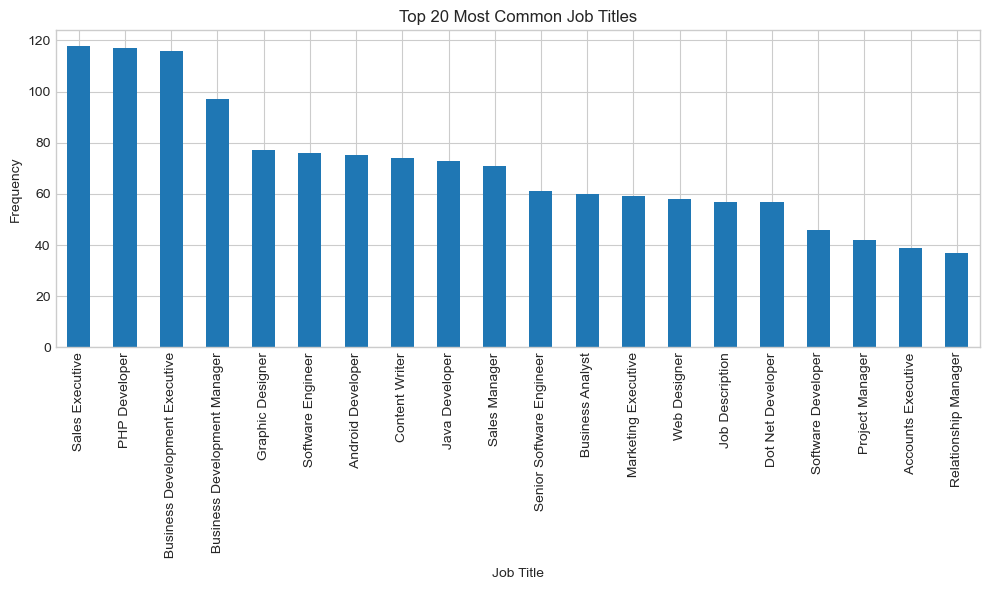

In [407]:
# 1. job_title
df_job_title = df.copy(deep=True)

# Total unique job titles
print(f"Total unique job titles: {df_job_title['job_title'].nunique()}")
print(f"Most common job title: {df_job_title['job_title'].mode()[0]}")

print("\nTop 20 Most Frequent Job Titles:")
display(df_job_title['job_title'].value_counts().head(20))

# Visualize top 20 job titles
top_titles = df_job_title['job_title'].value_counts().head(20)

plt.figure(figsize=(10, 6))
top_titles.plot(kind='bar')
plt.title('Top 20 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Number of rare job titles (<5 occurrences): 21593
Percentage of dataset they represent: 80.11%
Rare job titles (appear <5 times):


,job_title,count
0,Dot Net Developers,4
1,Android Lead,4
2,Tech Support Executive,4
3,Module Lead,4
4,PPC Executive,4
...,...,...
21588,Business Development / Corporate Sales,1
21589,Business Development Manager (BDM),1
21590,Software Engineer- Mobile Applications - Android,1
21591,Back End Java Developer - Restful Services/soap,1


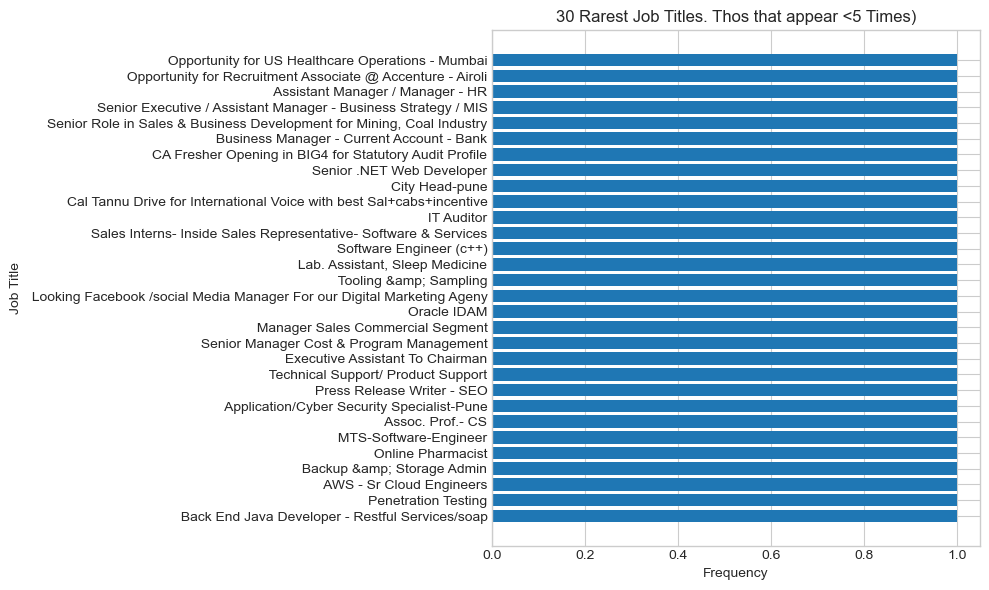

In [408]:
threshold = 5  # titles appearing less than 5 times
rare_count = (df_job_title['job_title'].value_counts() < threshold).sum()
rare_pct = round((rare_count / df_job_title.shape[0]) * 100, 2)

print(f"\nNumber of rare job titles (<5 occurrences): {rare_count}")
print(f"Percentage of dataset they represent: {rare_pct}%")

# Get the full frequency table
title_counts = df_job_title['job_title'].value_counts()

# Filter rare titles (< 5 occurrences)
rare_titles = title_counts[title_counts < 5]

# Display them as a DataFrame
rare_titles_df = rare_titles.reset_index()
rare_titles_df.columns = ['job_title', 'count']

print("Rare job titles (appear <5 times):")
display(rare_titles_df)

# Get rare titles sorted ascending (least frequent first)
rare_sorted = rare_titles.sort_values().head(30)

plt.figure(figsize=(10, 6))
plt.barh(rare_sorted.index, rare_sorted.values)
plt.title("30 Rarest Job Titles. Thos that appear <5 Times)")
plt.xlabel("Frequency")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

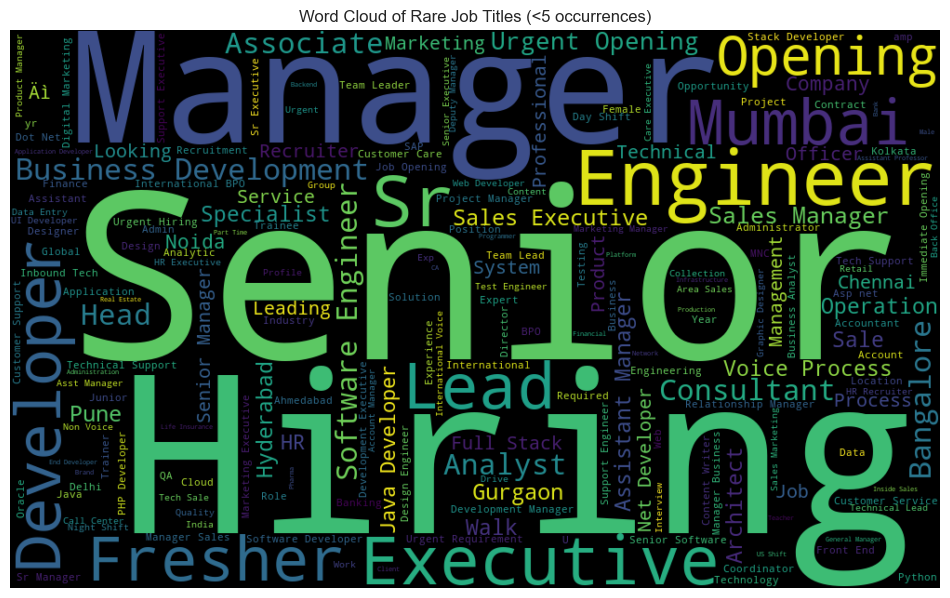

In [409]:
from wordcloud import WordCloud

rare_list = rare_titles.index.tolist()

wordcloud = WordCloud(width=1000, height=600).generate(" ".join(rare_list))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Rare Job Titles (<5 occurrences)")
plt.show()

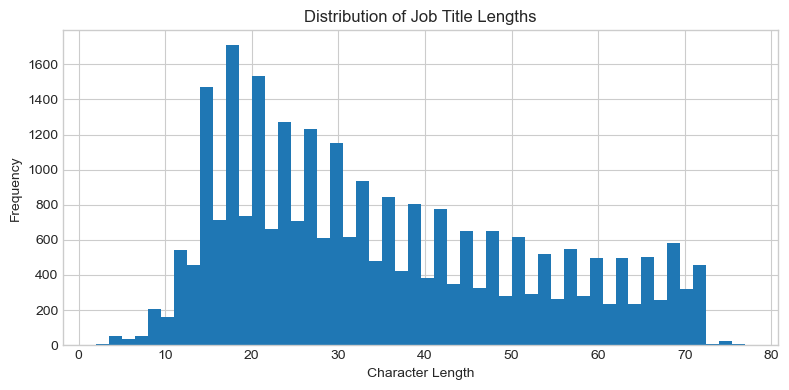


Title Length Statistics:


count    26954.000000
mean        34.745233
std         17.252036
min          2.000000
25%         20.000000
50%         31.000000
75%         47.000000
max         77.000000
Name: title_length, dtype: float64

In [410]:
df_job_title['title_length'] = df_job_title['job_title'].str.len()

plt.figure(figsize=(8,4))
df_job_title['title_length'].hist(bins=50)
plt.title("Distribution of Job Title Lengths")
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("\nTitle Length Statistics:")
display(df_job_title['title_length'].describe())

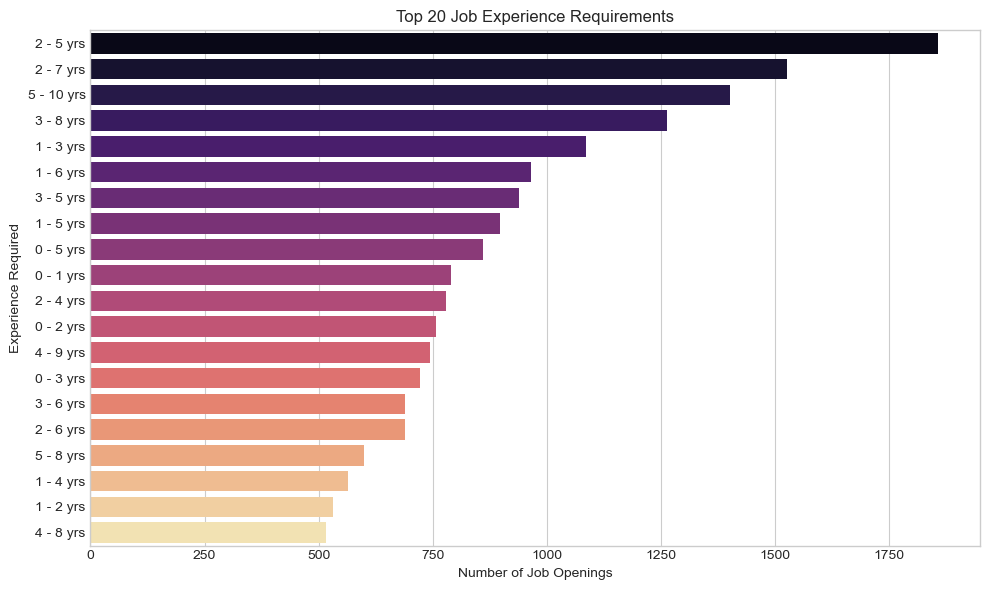

In [411]:
# 2. job_experience_required
df_job_experience = df.copy(deep=True)

# Get top 20 experience ranges
top_experience = df_job_experience['job_experience_required'].value_counts().head(20)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_experience.values, y=top_experience.index, palette='magma')
plt.title("Top 20 Job Experience Requirements")
plt.xlabel("Number of Job Openings")
plt.ylabel("Experience Required")
plt.tight_layout()
plt.show()

key_skills
javascript              2250
sales                   1815
sql                     1543
html                    1531
customer service        1286
java                    1209
python                  1163
jquery                  1088
business development    1055
recruitment             1037
technical support       1018
mysql                    920
management               907
bpo                      867
c                        817
web technologies         789
linux                    786
business executive       784
project management       774
marketing                742
Name: count, dtype: int64


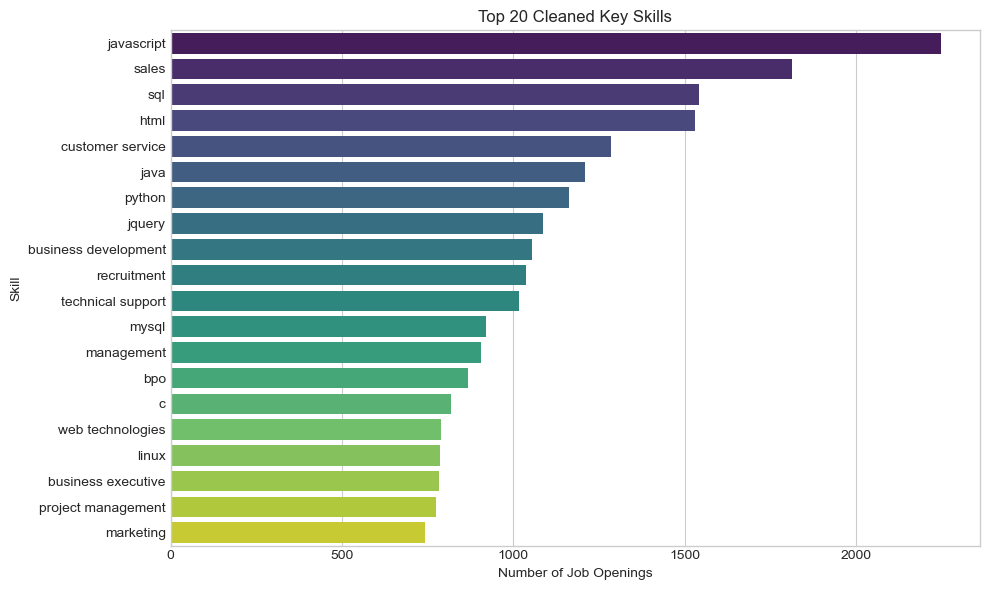

In [412]:
# 3. key_skills
df_skills = df.copy(deep=True)  

# Clean key_skills and analyze
# 1. Standardize, split by '|', strip spaces, lowercase
df_skills['key_skills'] = df_skills['key_skills'].dropna().apply(
    lambda x: [skill.strip().lower() for skill in x.split('|')]
)

# 2. Flatten all skills into one Series
all_skills = df_skills['key_skills'].explode()

# 3. Remove empty strings and obvious noise
noise = ['na', 'n/a', 'none', '']
all_skills = all_skills[~all_skills.isin(noise)]

# 4. Count frequency of each skill
skill_counts = all_skills.value_counts()

# 5. Top 20 skills
top_skills = skill_counts.head(20)
print(top_skills)

# 6. Bar plot for top 20 skills
plt.figure(figsize=(10,6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')
plt.title("Top 20 Cleaned Key Skills")
plt.xlabel("Number of Job Openings")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

In [413]:
# 4. role_category
df_role = df.copy(deep=True)
df_role['role_category'].value_counts()

role_category
Programming & Design                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

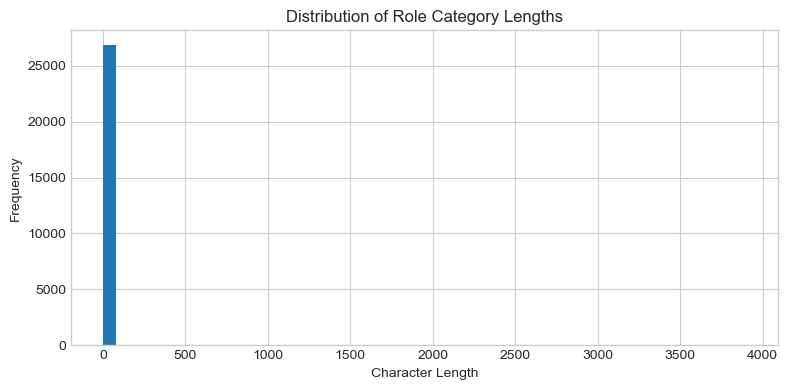


Role Category Length Statistics:


count    26954.000000
mean        22.579654
std         88.473203
min          3.000000
25%         12.000000
50%         20.000000
75%         20.000000
max       3896.000000
Name: role_category_length, dtype: float64

In [414]:
# Check length of each entry
df_role['role_category_length'] = df_role['role_category'].apply(lambda x: len(str(x)))

#df_role['role_length'] = df_role['role_category'].str.len()

plt.figure(figsize=(8,4))
df_role['role_category_length'].hist(bins=50)
plt.title("Distribution of Role Category Lengths")
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("\nRole Category Length Statistics:")
display(df_role['role_category_length'].describe())

role_category_clean
Programming & Design                          8353
Voice                                         2336
Retail Sales                                  2311
HR/ Recruitment / IR                          1097
Admin/Maintenance/Security/Datawarehousing     910
Accounts                                       859
Senior Management                              856
Other                                          849
Corporate Sales                                694
Production/Manufacturing/Maintenance           569
System Design/Implementation/ERP/CRM           492
Marketing                                      467
Medical Professional                           409
Creative                                       389
Engineering Design                             355
Finance/Audit                                  334
Teachers                                       319
Project Management                             300
University Level                               293
Back Office

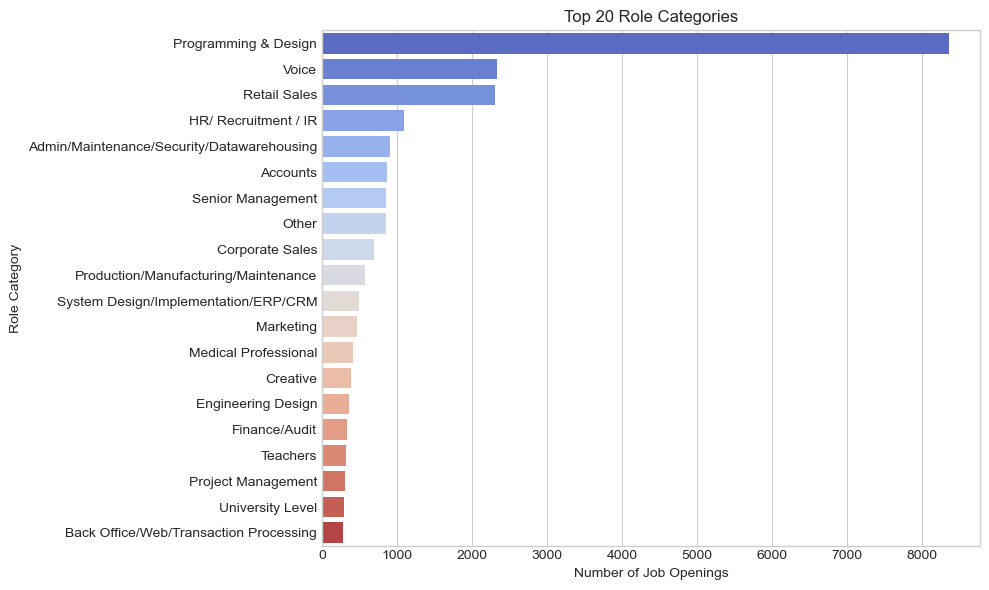

In [415]:
# Assume valid categories are less than 50 chars
df_role['role_category_clean'] = df_role['role_category'].apply(lambda x: x if len(str(x)) <= 100 else np.nan)

# Frequency counts
top_roles = df_role['role_category_clean'].value_counts().head(20)
print(top_roles)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_roles.values, y=top_roles.index, palette='coolwarm')
plt.title("Top 20 Role Categories")
plt.xlabel("Number of Job Openings")
plt.ylabel("Role Category")
plt.tight_layout()
plt.show()

In [416]:
# 5. location
df_location = df.copy(deep=True)
df_location['location'].value_counts()

location
Bengaluru                                              4583
Mumbai                                                 2995
Pune                                                   2275
Hyderabad                                              2018
Gurgaon                                                1586
                                                       ... 
Pune (Sadashiv Peth)                                      1
Bengaluru,Chennai,Hyderabad,Pune,Kolkata,Gurgaon          1
Guntur,Hyderabad,Vijayawada                               1
Srinagar,Kolkata                                          1
Mumbai (Mumbai Central) ,Mumbai Suburbs,Navi Mumbai       1
Name: count, Length: 2428, dtype: int64

location
Bengaluru         6160
Mumbai            4537
Pune              3163
Hyderabad         2981
Gurgaon           2666
Chennai           2373
Noida             1784
Delhi Ncr         1690
Delhi             1641
Kolkata           1638
Ahmedabad         1395
Navi Mumbai        501
Chandigarh         499
Mumbai Suburbs     322
Faridabad          217
Thane              214
Ghaziabad          187
Greater Noida      164
Coimbatore         118
Vadodara           104
Name: count, dtype: int64


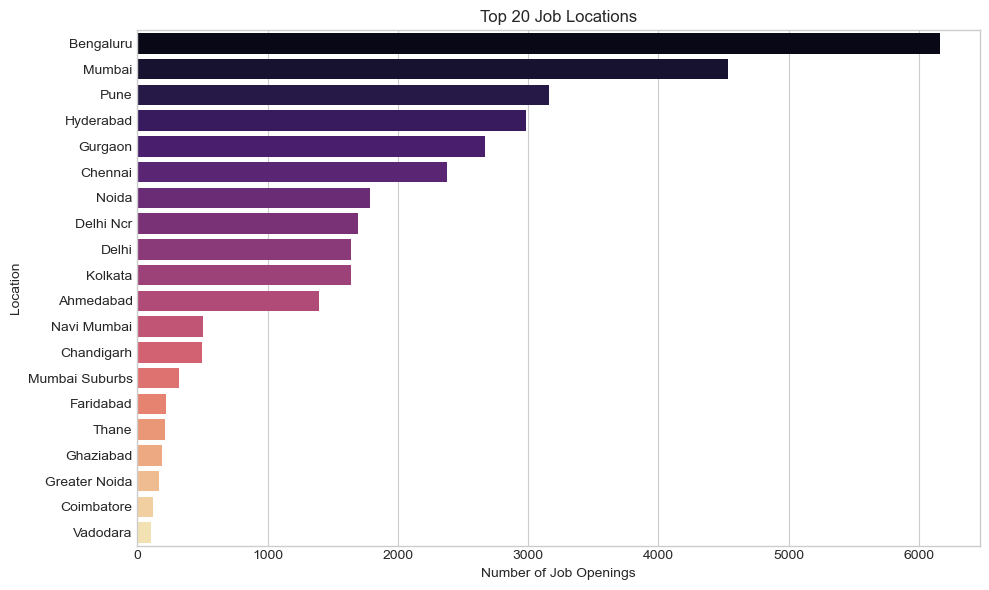

In [417]:
# Strip whitespace and standardize casing
df_location['location'] = df_location['location'].dropna().apply(lambda x: x.strip().title())

# Split multiple locations and flatten
locations_series = df_location['location'].dropna().apply(lambda x: [loc.strip() for loc in x.split(',')])
all_locations = locations_series.explode()

location_counts = all_locations.value_counts()
top_locations = location_counts.head(20)
print(top_locations)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')
plt.title("Top 20 Job Locations")
plt.xlabel("Number of Job Openings")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

In [418]:
# 6. functional_area
df_func_area = df.copy(deep=True)
df_func_area['functional_area'].value_counts()

functional_area
IT Software - Application Programming , Maintenance                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        7223
Sales , Retail , Business Development                   

functional_area_clean
Maintenance                              7913
IT Software - Application Programming    7223
Retail                                   3980
Business Development                     3980
Sales                                    3980
BPO                                      3112
ITES                                     3112
KPO                                      3112
Customer Service                         3112
Operations                               3112
LPO                                      3112
IR                                       1360
Recruitment                              1360
Administration                           1360
HR                                       1360
Accounts                                 1330
Company Secretary                        1330
Tax                                      1330
Finance                                  1330
Audit                                    1330
Name: count, dtype: int64


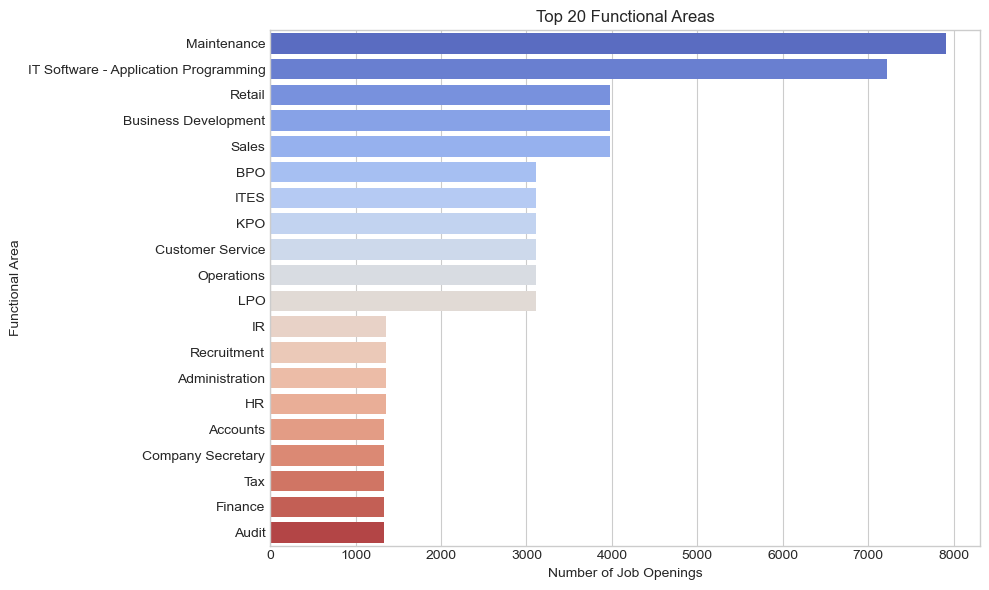

In [419]:
# Length of each entry
df_func_area['functional_area_length'] = df_func_area['functional_area'].apply(lambda x: len(str(x)))

# Keep likely valid areas (e.g., <100 chars)
df_func_area['functional_area_clean'] = df_func_area['functional_area'].apply(lambda x: x if len(str(x)) < 100 else np.nan)

# Split by comma and strip whitespace
fa_series = df_func_area['functional_area_clean'].dropna().apply(lambda x: [fa.strip() for fa in x.split(',')])
all_functional_areas = fa_series.explode()

fa_counts = all_functional_areas.value_counts()
top_functional_areas = fa_counts.head(20)
print(top_functional_areas)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_functional_areas.values, y=top_functional_areas.index, palette='coolwarm')
plt.title("Top 20 Functional Areas")
plt.xlabel("Number of Job Openings")
plt.ylabel("Functional Area")
plt.tight_layout()
plt.show()

In [420]:
# 7. industry
df_industry = df.copy(deep=True)
df_industry['industry'].value_counts()

industry
IT-Software, Software Services                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             9666
Recruitment, Staffing                                          

Top 20 Industries:
 industry_clean
IT-Software                        9666
Software Services                  9666
Recruitment                        2496
Staffing                           2496
Call Centre                        1683
BPO                                1683
ITeS                               1683
Financial Services                 1519
Broking                            1519
Banking                            1519
Teaching                           1067
Education                          1067
Training                           1067
Internet                            955
IT-Software / Software Services     786
Healthcare                          574
Hospitals                           574
Medical                             574
Ecommerce                           532
Construction                        499
Name: count, dtype: int64


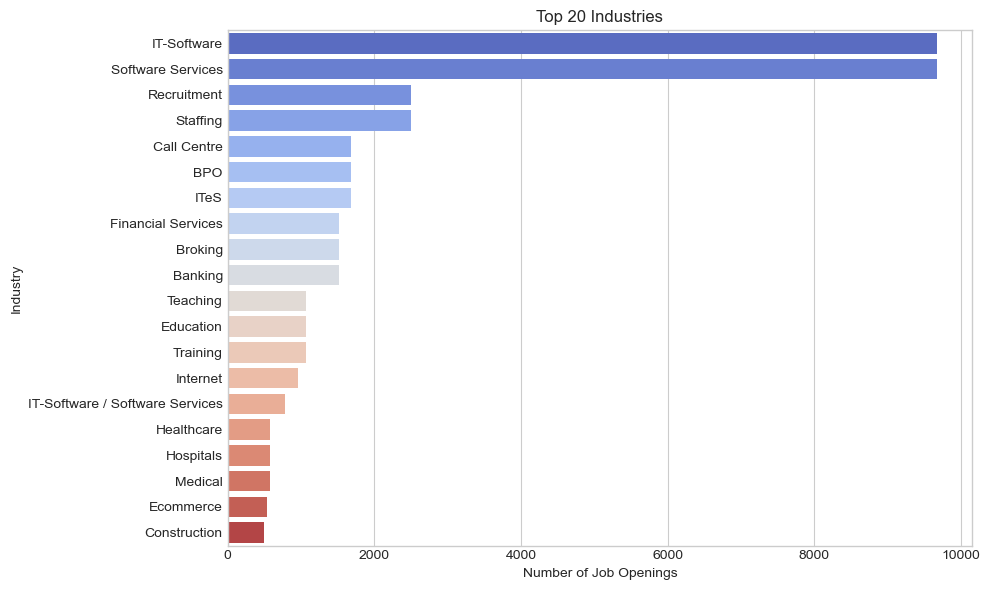

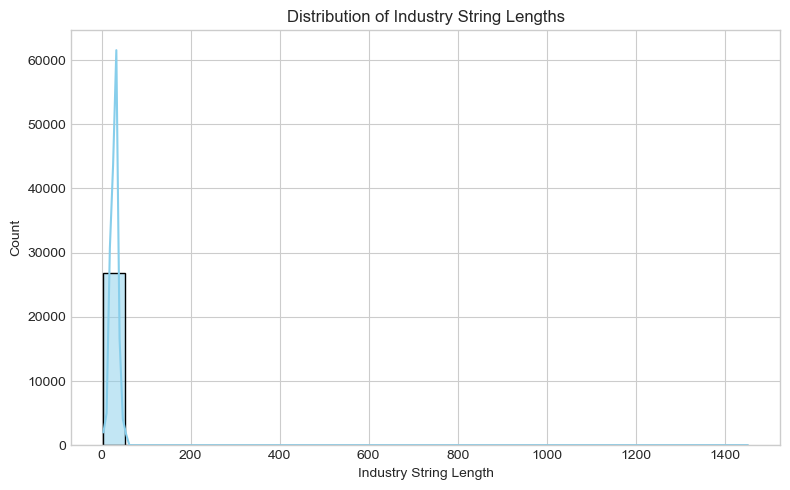

In [421]:
# 1. Clean industry column

# Keep short entries (<100 chars) as likely valid
df_industry['industry_clean'] = df_industry['industry'].apply(lambda x: x if len(str(x)) < 100 else np.nan)

# Calculate length of each entry for visualization
df_industry['industry_length'] = df_industry['industry'].dropna().apply(lambda x: len(str(x)))

# Split multiple industries and flatten
industry_series = df_industry['industry_clean'].dropna().apply(lambda x: [ind.strip() for ind in x.split(',')])
all_industries = industry_series.explode()

# Remove empty strings
all_industries = all_industries[all_industries != '']

# ------------------------------
# 2. Count frequencies
# ------------------------------
industry_counts = all_industries.value_counts()
top_industries = industry_counts.head(20)
print("Top 20 Industries:\n", top_industries)

# ------------------------------
# 3. Visualize top 20 industries
# ------------------------------
plt.figure(figsize=(10,6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette='coolwarm')
plt.title("Top 20 Industries")
plt.xlabel("Number of Job Openings")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

# ------------------------------
# 4. Visualize distribution of industry string lengths
# ------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df_industry['industry_length'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Industry String Lengths")
plt.xlabel("Industry String Length")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [422]:
# 8. role
df_role = df.copy(deep=True)
df_role['role'].value_counts()

role
Software Developer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    6242
Associate/Senior Associate -(NonTechnical)                                              

Top 20 Roles:
 role_clean
Software Developer                            6242
Associate/Senior Associate -(NonTechnical)    1685
Sales/Business Development Manager            1525
Sales Executive/Officer                       1152
Team Lead/Technical Lead                       832
Associate/Senior Associate -(Technical)        502
Accounts Executive/Accountant                  496
Recruitment Executive                          416
Testing Engineer                               400
Fresher                                        373
Technical Architect                            354
System Administrator                           314
HR Executive                                   289
Business Analyst                               264
Telecalling/Telemarketing Executive            223
Design Engineer                                220
Head/VP/GM/National Manager -Sales             213
Project Manager-IT/Software                    210
Technical Support Engineer                     204
Train

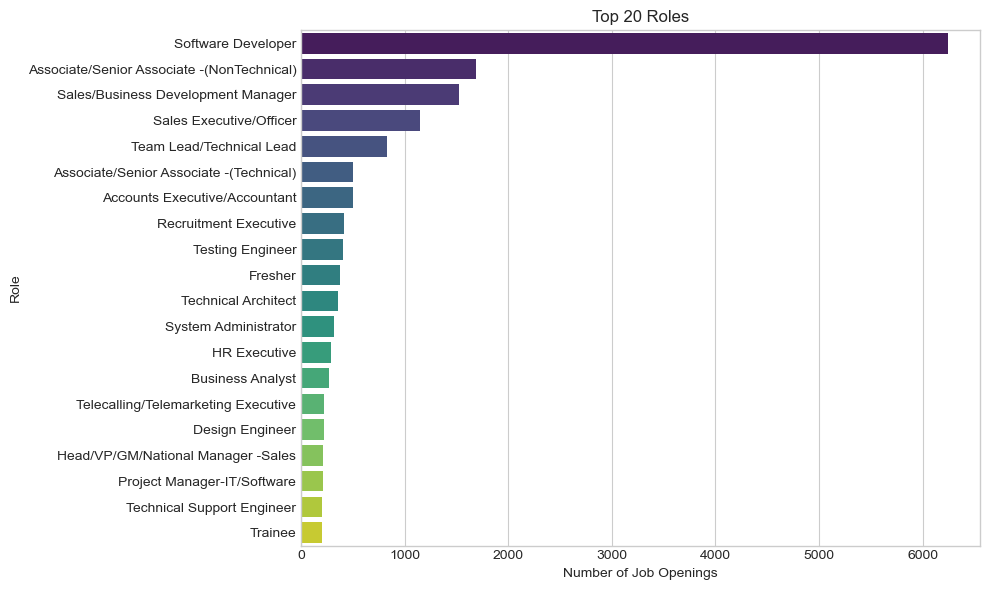

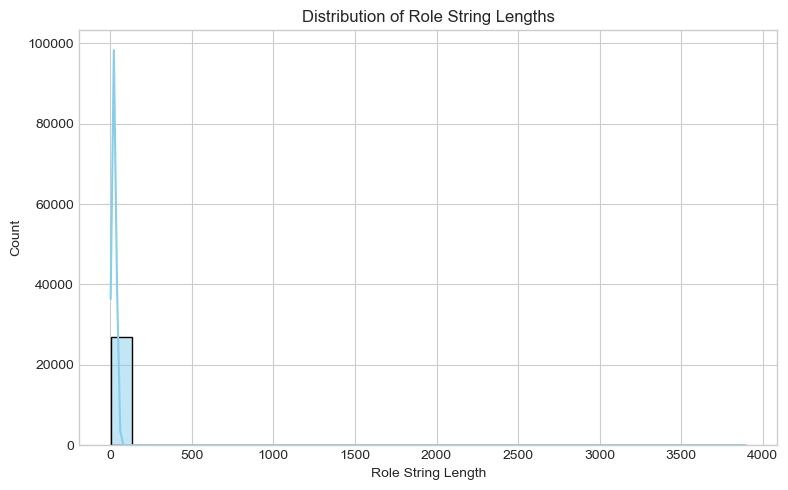

In [423]:
# 1. Clean role column
#  Keep short entries (<100 chars) as likely valid
df_role['role_clean'] = df_role['role'].apply(lambda x: x if len(str(x)) < 100 else np.nan)

# Calculate length of each entry for visualization
df_role['role_length'] = df_role['role'].dropna().apply(lambda x: len(str(x)))

# Remove empty strings
df_role['role_clean'] = df_role['role_clean'].replace('', np.nan)

# 2. Count frequencies
role_counts = df_role['role_clean'].dropna().value_counts()
top_roles = role_counts.head(20)
print("Top 20 Roles:\n", top_roles)

# 3. Visualize top 20 roles
plt.figure(figsize=(10,6))
sns.barplot(x=top_roles.values, y=top_roles.index, palette='viridis')
plt.title("Top 20 Roles")
plt.xlabel("Number of Job Openings")
plt.ylabel("Role")
plt.tight_layout()
plt.show()

# 4. Visualize distribution of role string lengths
plt.figure(figsize=(8,5))
sns.histplot(df_role['role_length'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Role String Lengths")
plt.xlabel("Role String Length")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [424]:
# 9. job_salary
df_salary = df.copy(deep=True)
df_salary['job_salary'].value_counts()

job_salary
 Not Disclosed by Recruiter                     18314
 Not Disclosed by Recruiter                       613
Openings: 1                                       408
 2,00,000 - 3,00,000 PA.                          139
 2,00,000 - 4,00,000 PA.                          134
                                                ...  
INR 14,00,000 - 15,00,000 PA.                       1
INR 7,00,000 - 8,00,000 PA.                         1
 Salary+bonus                                       1
 Plus Esi,pf, Bonus and Leave as applicable         1
 35,00,000 - 70,00,000 PA.                          1
Name: count, Length: 1038, dtype: int64


=== Salary Bucket Summary ===
    bucket  count  proportion
0    2L–4L   2693    0.394984
1    4L–7L   1364    0.200059
2      ≤2L   1062    0.155764
3  10L–15L    669    0.098123
4   7L–10L    594    0.087122
5  15L–25L    305    0.044735
6  25L–50L    116    0.017014
7     50L+     15    0.002200


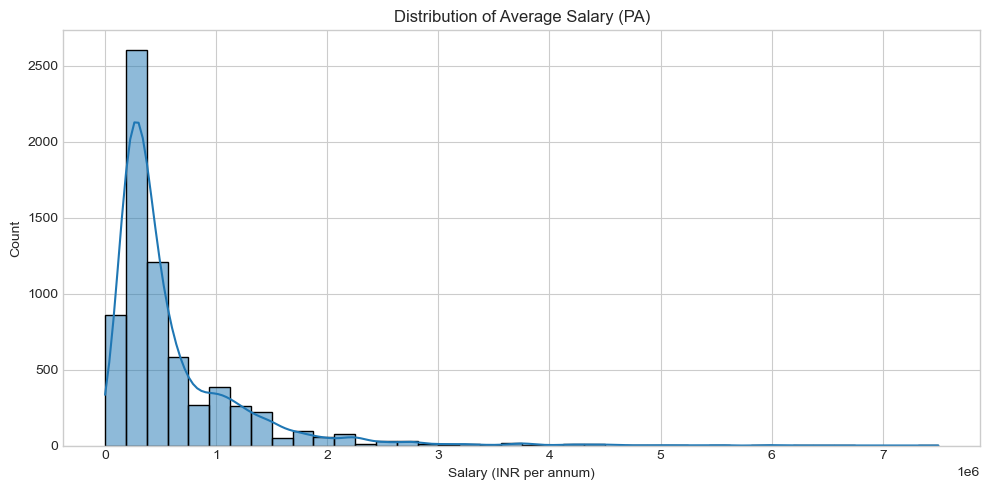

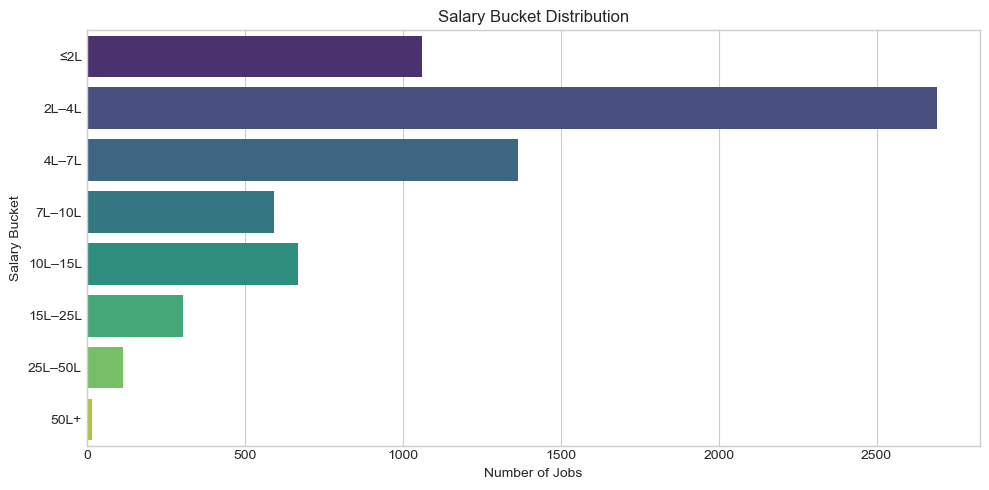

In [ ]:
# 1. Copy
df_salary = df.copy(deep=True)

# 2. Remove irrelevant entries
irrelevant_patterns = [
    'Openings:', 'bonus', 'Bonus', 'Esi', 'pf', 'Salary', 'Leave'
]

df_salary['job_salary_clean'] = df_salary['job_salary'].astype(str)

for pattern in irrelevant_patterns:
    df_salary.loc[
        df_salary['job_salary_clean'].str.contains(pattern, case=False, na=False),
        'job_salary_clean'
    ] = np.nan

# 3. Keep valid salary ranges
pattern_salary = r'(\d{1,3}(?:,\d{2,3})*)\s*-\s*(\d{1,3}(?:,\d{2,3})*)'
valid_mask = df_salary['job_salary_clean'].str.contains(pattern_salary, na=False)
df_salary = df_salary[valid_mask]

# 4. Convert salaries to numbers
def clean_num(x):
    return int(x.replace(",", ""))

df_salary[['min_salary','max_salary']] = (
    df_salary['job_salary_clean']
    .str.extract(pattern_salary)
    .applymap(clean_num)
)

# 5. Midpoint salary
df_salary['avg_salary'] = (df_salary['min_salary'] + df_salary['max_salary']) / 2

# CREATE SALARY BUCKETS
bins = [0, 200000, 400000, 700000, 1000000, 1500000, 2500000, 5000000, 99999999]
labels = [
    "≤2L", "2L–4L", "4L–7L", "7L–10L", "10L–15L",
    "15L–25L", "25L–50L", "50L+"
]

df_salary['salary_bucket'] = pd.cut(df_salary['avg_salary'], bins=bins, labels=labels, right=True)

# Bucket summary
bucket_summary = df_salary['salary_bucket'].value_counts().rename_axis("bucket").reset_index(name="count")
bucket_summary["proportion"] = bucket_summary["count"] / bucket_summary["count"].sum()

print("\n=== Salary Bucket Summary ===")
print(bucket_summary)

# VISUALIZe
plt.figure(figsize=(10,5))
sns.histplot(df_salary['avg_salary'], bins=40, kde=True)
plt.title("Distribution of Average Salary (PA)")
plt.xlabel("Salary (INR per annum)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=bucket_summary, x="count", y="bucket", palette="viridis")
plt.title("Salary Bucket Distribution")
plt.xlabel("Number of Jobs")
plt.ylabel("Salary Bucket")
plt.tight_layout()
plt.show()

# Add the salary bucket back to the original df
df['salary_bucket'] = df_salary['salary_bucket']

In [426]:
df_salary.isna().sum()

job_title                  0
job_salary                 0
job_experience_required    0
key_skills                 0
role_category              0
location                   0
functional_area            0
industry                   0
role                       0
job_salary_clean           0
min_salary                 0
max_salary                 0
avg_salary                 0
salary_bucket              0
dtype: int64

In [427]:
df.isna().sum()

job_title                      0
job_salary                     0
job_experience_required        0
key_skills                     0
role_category                  0
location                       0
functional_area                0
industry                       0
role                           0
salary_bucket              20136
dtype: int64